# Notebook 2: Topic modeling

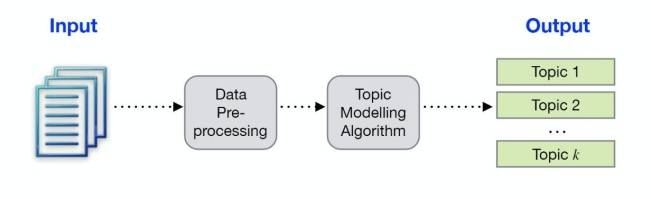

## Load data

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import fetch_20newsgroups

newsgroups = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))
print(newsgroups["DESCR"][:394])

docs, labels, target_names = newsgroups["data"], newsgroups["target"], newsgroups["target_names"]

## 1. The classics: LDA

Latent Dirichlet Allocation is a generative probabilistic model for collections of discrete dataset such as text corpora. It is also a topic model that is used for discovering abstract topics from a collection of documents.

When LatentDirichletAllocation is applied on a “document-term” matrix, the matrix will be decomposed into a “topic-term” matrix and a “document-topic” matrix. While “topic-term” matrix is stored as components_ in the model, “document-topic” matrix can be calculated from transform method.

Further reading:
- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html
- https://www.depends-on-the-definition.com/lda-from-scratch/

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
vectorizer = CountVectorizer(max_features=10000, stop_words="english", max_df=0.95, min_df=2,)
encoded_docs = vectorizer.fit_transform(docs)

In [ ]:
lda = LatentDirichletAllocation(n_components=10, random_state=2022)

lda.fit(encoded_docs)

In [ ]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 8), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [ ]:
plot_top_words(lda, feature_names=vectorizer.get_feature_names_out(), n_top_words=10, title="Topics in LDA model")

## 2. The "modern" approach: BERTopic

We use similar tools as in part one. Could replace everything by language models.

Further reading:
- https://maartengr.github.io/BERTopic/
- Dynamic topic modelling: https://maartengr.github.io/BERTopic/getting_started/topicsovertime/topicsovertime.html


In [ ]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import TfidfVectorizer

# here we use a TFIDF-model, but we also could use a language model here (with GPU)
vectorizer_model = CountVectorizer(stop_words="english")

vectorizer = TfidfVectorizer(min_df=5, max_df=0.9, stop_words="english")
embeddings = vectorizer.fit_transform(docs)

# Train our topic model using TF-IDF vectors
topic_model = BERTopic(vectorizer_model=vectorizer_model)
topics, probs = topic_model.fit_transform(docs, embeddings)

### 2.1 Visualize the topics

https://maartengr.github.io/BERTopic/algorithm/algorithm.html

Further reading:
- https://maartengr.github.io/BERTopic/getting_started/visualization/visualization.html

In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_model.visualize_documents(docs, embeddings=embeddings)

In [ ]:
# Reduce topics
topic_model.reduce_topics(docs, nr_topics=20)

In [ ]:
topic_model.visualize_documents(docs, embeddings=embeddings)

In [ ]:
# Look at the topic top words
topic_model.get_topic(3)[:10]